# **BUSINESS PROBLEM**


In [ ]:
# importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
# loading the dataset

table=pd.read_csv("Salaries.csv")
table.sample(5)

,rank,discipline,phd,service,sex,salary
32,Prof,A,27,19,Male,103275
52,Prof,A,12,0,Female,105000
73,Prof,B,18,10,Female,105450
54,AssocProf,A,25,22,Female,62884
25,Prof,B,35,31,Male,99418


# **UNDERSTANDING THE DATA**

In [ ]:
table.columns

Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')

In [ ]:
table.shape

(78, 6)

In [ ]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        78 non-null     object
 1   discipline  78 non-null     object
 2   phd         78 non-null     int64 
 3   service     78 non-null     int64 
 4   sex         78 non-null     object
 5   salary      78 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ KB


In [ ]:
table.isnull().sum()*100

,0
rank,0
discipline,0
phd,0
service,0
sex,0
salary,0


<Axes: >

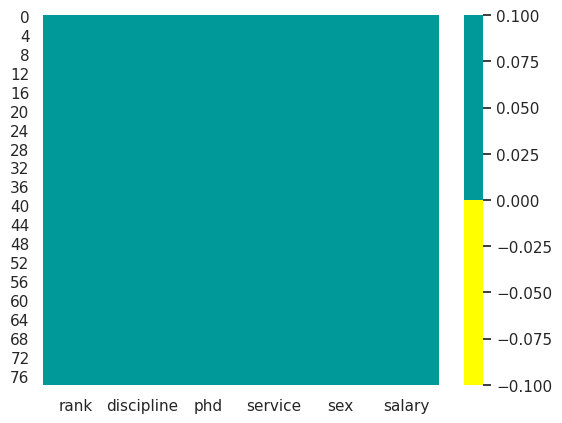

In [ ]:
cols=table.columns
color=["#ffff00","#009999"]
sns.heatmap(table[cols].isnull(),cmap=sns.color_palette(color))


In [ ]:
table[table.duplicated()].shape

(0, 6)

In [ ]:
table.groupby(["sex"]).agg({"salary":["mean","min","max"]})

salary               
                 mean    min     max
sex                                 
Female  101002.410256  62884  161101
Male    115045.153846  57800  186960

In [ ]:
table.nunique().sum() # no of unique values

149

In [ ]:
# Value counts of categorical data

table["rank"].value_counts()

,count
rank,
Prof,46
AsstProf,19
AssocProf,13


In [ ]:
table["sex"].value_counts()

,count
sex,
Male,39
Female,39


In [ ]:
table["discipline"].value_counts()

,count
discipline,
B,42
A,36


# **STATISTICAL OVERVIEW**

In [ ]:
table.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
phd,78.0,19.705128,12.498425,1.0,10.25,18.5,27.75,56.0
service,78.0,15.051282,12.139768,0.0,5.25,14.5,20.75,51.0
salary,78.0,108023.782051,28293.661022,57800.0,88612.50,104671.0,126774.75,186960.0


In [ ]:
# visualizing the distplot using axv line

table1=table.copy()


In [ ]:
x=table1.drop(columns=["phd"])
y=table1["phd"]

In [ ]:
sns.set_theme(style="whitegrid")
def dist_plot (x,y):
  fig=plt.figure(figsize=(15,5))
  ax=fig.add_subplot(121)
  sns.histplot(x,kde=True,ax=ax,color="lightgreen")
  ax.axvline(x.mean(),color="red",linestyle="-",linewidth=1.5)
  ax.axvline(x.median(),color="blue",linestyle="--",linewidth=1.5)
  ax.legend(labels=["kde","mean","median"])

  ax.set_title("kde plot")
  ax2=fig.add_subplot(122)
  sns.boxplot(x,ax=ax2,color="lightsalmon")
  ax2.set_title("Boxplot")
  plt.show()


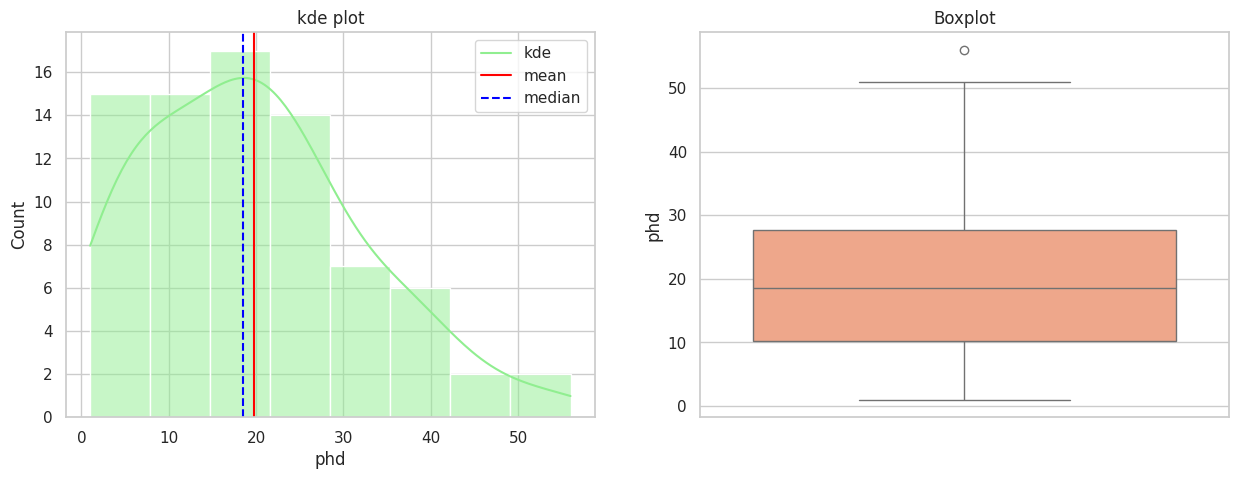

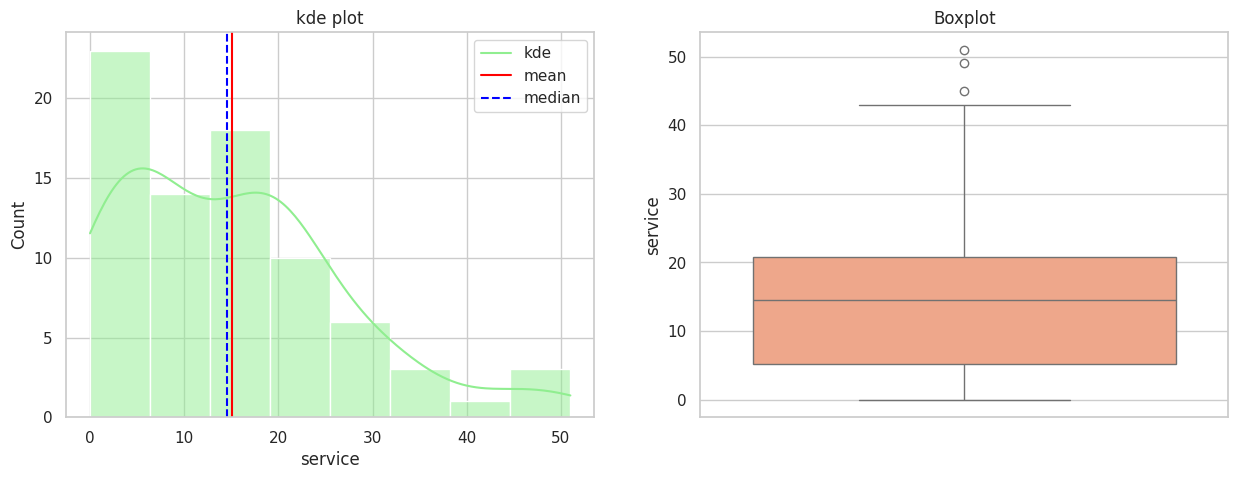

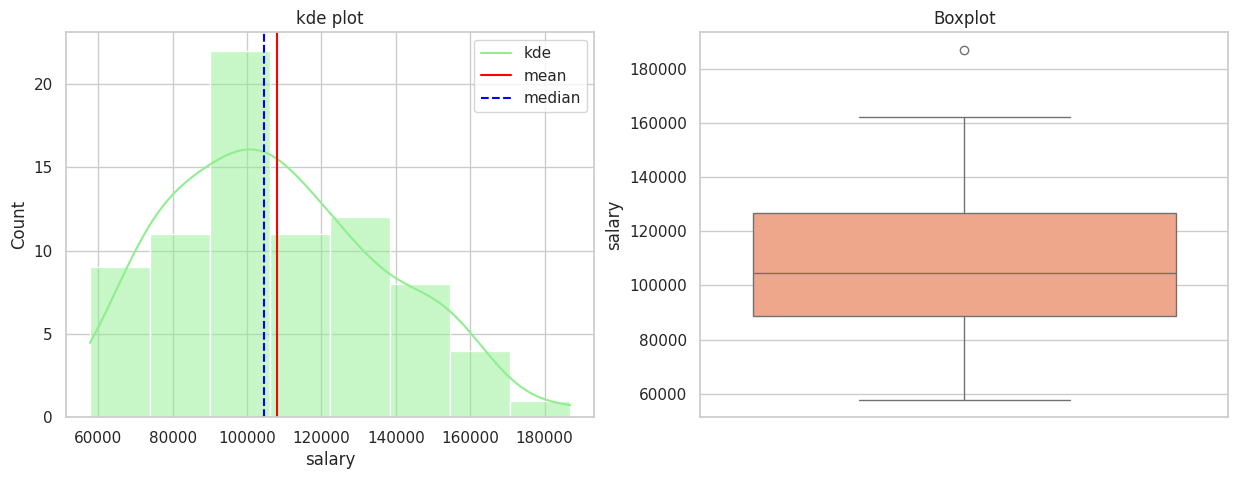

In [ ]:
for i in list(table.select_dtypes(include=["number"]).columns):
  dist_plot(table[i],i)
  plt.show()

# **DATA VISUALIZATIONS**

<Figure size 1200x800 with 0 Axes>

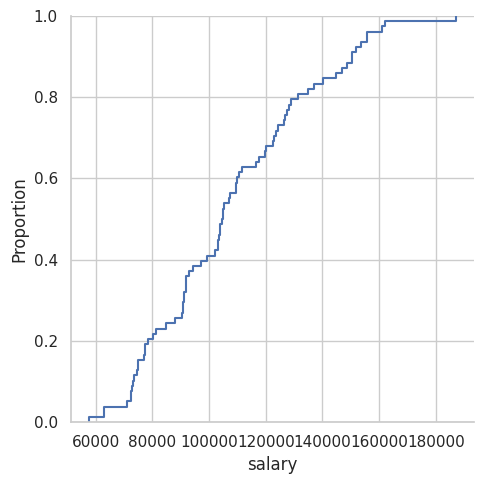

In [ ]:
# UNIVARIATE ANALYSIS
plt.figure(figsize=(12,8))
sns.displot(table,x="salary",kind="ecdf")


<Figure size 1200x800 with 0 Axes>

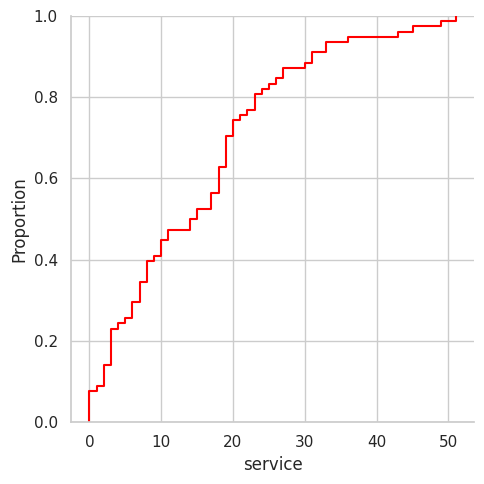

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(table,x="service",kind="ecdf",color="red")

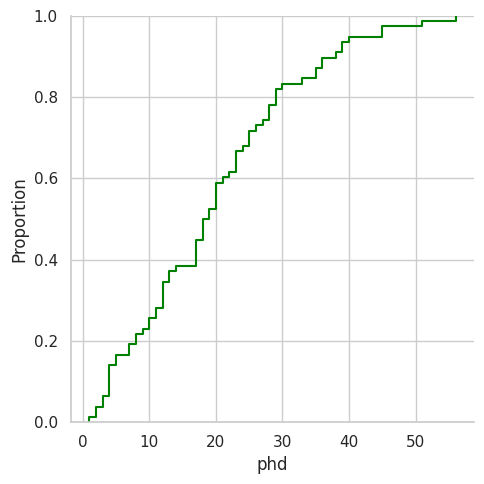

In [ ]:
sns.displot(table,x="phd",kind="ecdf",color="green")

<Figure size 1500x500 with 0 Axes>

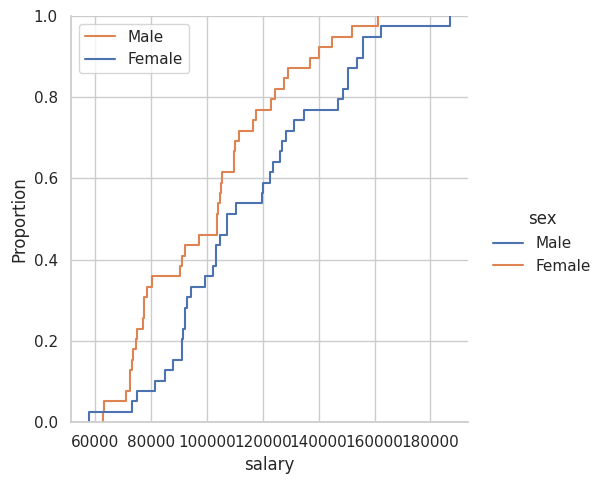

In [ ]:
# salary comparision (male vs female )


sns.displot(table,x="salary",hue="sex",kind="ecdf")
plt.legend(labels=["Male","Female"])

<Axes: xlabel='sex', ylabel='count'>

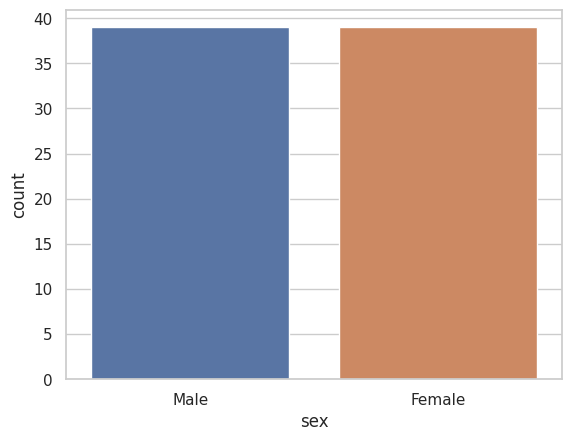

In [ ]:
sns.countplot(table,x="sex",hue="sex")

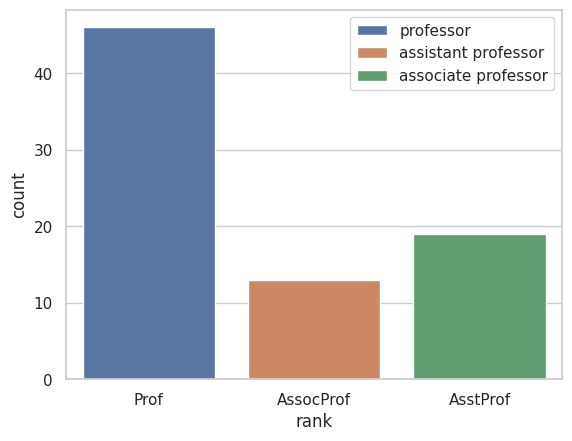

In [ ]:
# bivariate analysis
sns.countplot(table,x="rank",hue="rank")
plt.legend(labels=["professor","assistant professor","associate professor"])

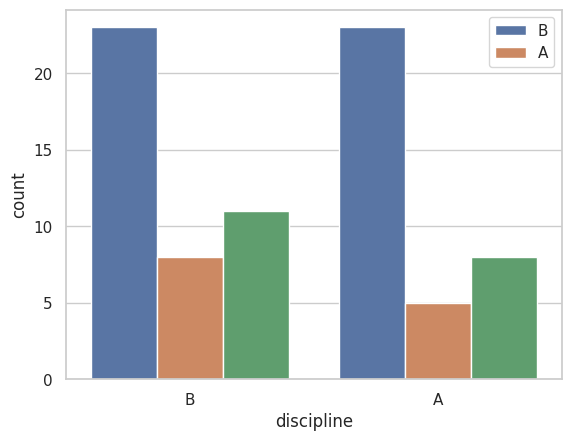

In [ ]:
sns.countplot(table,x="discipline",hue="rank")
plt.legend(labels=["B","A"])
plt.show()

In [ ]:
a=table["rank"].value_counts()
percent=round(a/78*100,2)
percent



,count
rank,
Prof,58.97
AsstProf,24.36
AssocProf,16.67


<Axes: ylabel='count'>

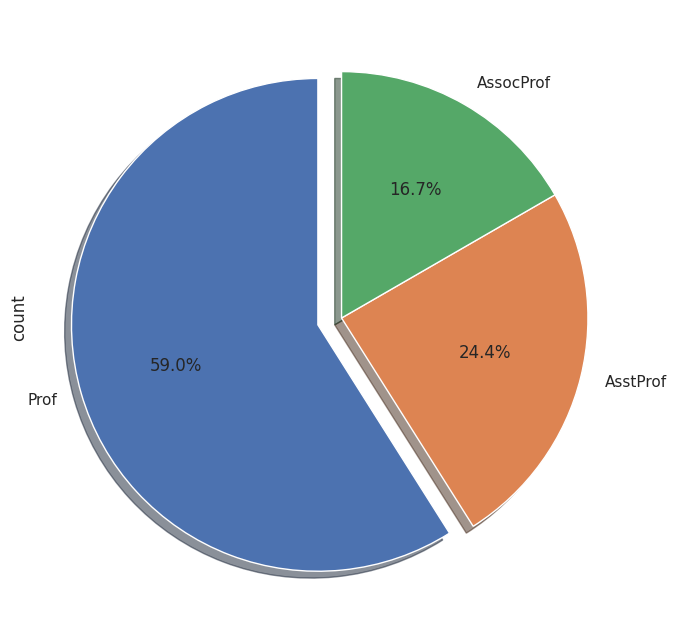

In [ ]:
explode=(0.1,0,0)
percent.plot(figsize=(10,8),kind="pie",autopct="%1.1f%%",shadow=True,startangle=90,explode=explode)

In [ ]:
b=table["discipline"].value_counts()
percent=round(b/78*100,2)
percent


,count
discipline,
B,53.85
A,46.15


<Axes: ylabel='count'>

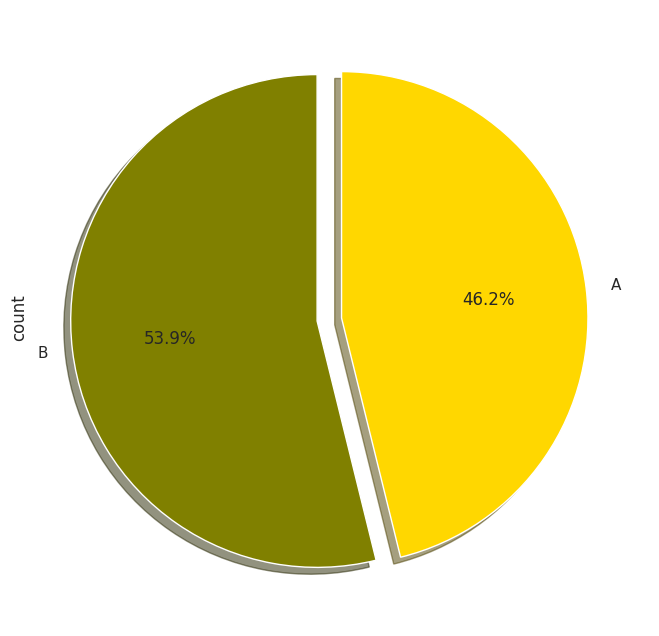

In [ ]:
explode=(0.1,0)
percent.plot(figsize=(10,8),kind="pie",autopct="%1.1f%%",shadow=True,startangle=90,explode=explode,colors=["olive","gold"])

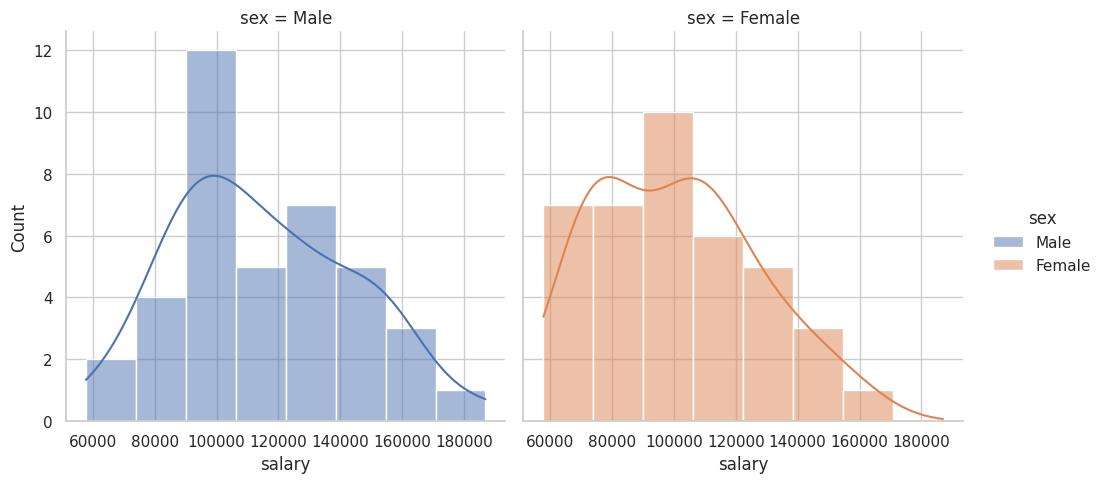

In [ ]:
# comparitive analysis

sns.displot(table,x="salary",col="sex",kde=True,hue="sex")


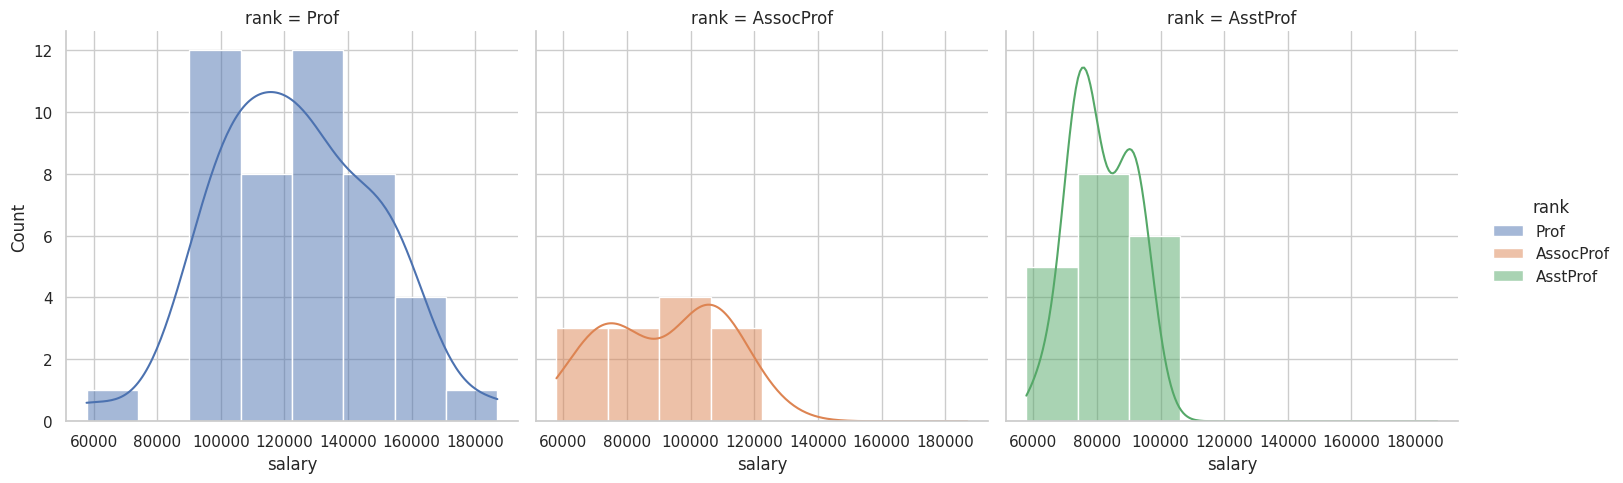

In [ ]:
sns.displot(table,x="salary",col="rank",kde=True,hue="rank")

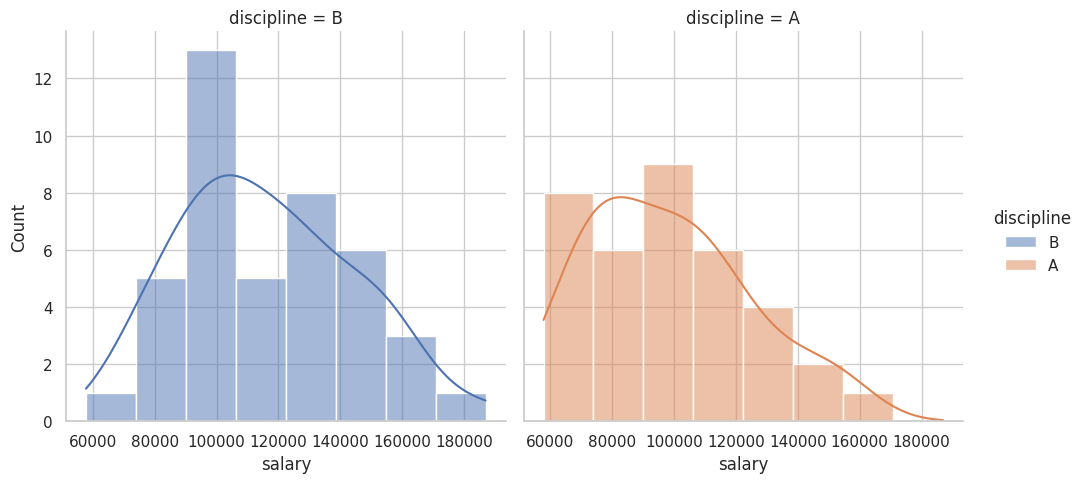

In [ ]:
sns.displot(table,x="salary",col="discipline",kde=True,hue="discipline")

# **INFERENCES:**

* From the above visualizations , we can observe that salary for male employees are comparitively more than female employees
* amongst which employees with rank professor have comparitively more salary (59%) -- refer to the pie chart
* Assistant professors are the second highest earning employees (24.4%)
* this is because , the  Professors are more in count compared to assistant professors and assistant professors
* Employees with discipline B have more salary than that of employees with discipline A

<Axes: xlabel='salary', ylabel='service'>

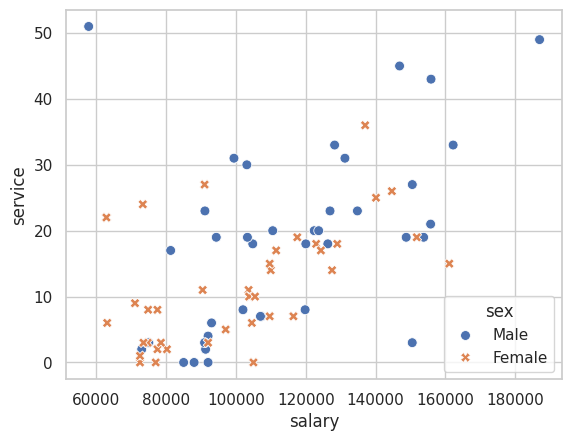

In [ ]:
sns.scatterplot(x="salary",y="service",data=table,s=50,hue="sex",style="sex")